## Scrapping the tweets between 5th of December - 11st of December

Uncoment below line to re-scrap

In [206]:
# import twint
# import nest_asyncio

# nest_asyncio.apply()

# c = twint.Config()
# c.Username = "collegemenfess"
# c.Since = "2022-12-05"
# c.Until = "2022-12-11"
# c.Store_csv = True
# c.Output = "collegemenfess.csv"
# c.Limit = 5000
# c.Pandas = True

# twint.run.Search(c)

In [207]:
import pandas as pd
import numpy as np

df = pd.read_csv("collegemenfess.csv")

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1603569991151804417,1603569991151804417,2022-12-16 08:57:33 WIB,2022-12-16,08:57:33,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1603569910097285120,1603569910097285120,2022-12-16 08:57:14 WIB,2022-12-16,08:57:14,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1603569275658448896,1603569275658448896,2022-12-16 08:54:42 WIB,2022-12-16,08:54:42,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1603569076390924289,1603569076390924289,2022-12-16 08:53:55 WIB,2022-12-16,08:53:55,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1603568860145528832,1603568860145528832,2022-12-16 08:53:03 WIB,2022-12-16,08:53:03,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [208]:
# remove other column except tweet

df = df[['tweet']]
df['real_tweet'] = df['tweet']

df.head()

,tweet,real_tweet
0,[cm] smt 5 mending ikut studi independen dulu ...,[cm] smt 5 mending ikut studi independen dulu ...
1,[cm] di kampus kalian mahasiswa s1 wajib publi...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,[CM] Dosen praktikum aku ngasih ini waktu pert...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,[cm] Alhamdulilah masih bisa hidup walaupun di...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [209]:
import re
def cleanTxt(text):
    text = re.sub(r'\[cm\]|\[CM\]|\[Cm\]|\[cM\]', '', text)
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\w+:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('[^a-zA-Z]', ' ', text)
    # lower case
    text = text.lower()
    # delete unicode
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text

In [210]:
# combine tweets that not have [CM] or [cm] or [Cm] or [cM] to one tweet above
# and remove [CM] or [cm] or [Cm] or [cM] from tweet

def combineTweet(text):
    if text.startswith('[cm]') or text.startswith('[CM]') or text.startswith('[Cm]') or text.startswith('[cM]'):
        return text
    else:
        i = df[df['tweet'] == text].index[0]
        text = text + ' ' + df['tweet'][i-1]
        df['tweet'][i-1] = ''
        return text




In [211]:



df['real_tweet'] = df['real_tweet'].apply(cleanTxt)
# df['real_tweet'] = df['real_tweet'].apply(combineTweet)

In [212]:
df.shape

(9860, 2)

In [213]:
# Clean the tweets
df['tweet'] = df['tweet'].apply(cleanTxt)

df.head()

,tweet,real_tweet
0,smt mending ikut studi independen dulu apa ...,smt mending ikut studi independen dulu apa ...
1,di kampus kalian mahasiswa s wajib publish j...,di kampus kalian mahasiswa s wajib publish j...
2,bisa gk yh tugas uas ini ngerjain dirinya sen...,bisa gk yh tugas uas ini ngerjain dirinya sen...
3,dosen praktikum aku ngasih ini waktu pertemua...,dosen praktikum aku ngasih ini waktu pertemua...
4,alhamdulilah masih bisa hidup walaupun dikasi...,alhamdulilah masih bisa hidup walaupun dikasi...


In [214]:
# tokenization
import nltk
from nltk.tokenize import word_tokenize
df['tweet'] = df['tweet'].apply(word_tokenize)

df.head()

,tweet,real_tweet
0,"[smt, mending, ikut, studi, independen, dulu, ...",smt mending ikut studi independen dulu apa ...
1,"[di, kampus, kalian, mahasiswa, s, wajib, publ...",di kampus kalian mahasiswa s wajib publish j...
2,"[bisa, gk, yh, tugas, uas, ini, ngerjain, diri...",bisa gk yh tugas uas ini ngerjain dirinya sen...
3,"[dosen, praktikum, aku, ngasih, ini, waktu, pe...",dosen praktikum aku ngasih ini waktu pertemua...
4,"[alhamdulilah, masih, bisa, hidup, walaupun, d...",alhamdulilah masih bisa hidup walaupun dikasi...


In [215]:
# stemming using sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['tweet'] = df['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head()

,tweet,real_tweet
0,"[smt, mending, ikut, studi, independen, dulu, ...",smt mending ikut studi independen dulu apa ...
1,"[di, kampus, kalian, mahasiswa, s, wajib, publ...",di kampus kalian mahasiswa s wajib publish j...
2,"[bisa, gk, yh, tugas, uas, ini, ngerjain, diri...",bisa gk yh tugas uas ini ngerjain dirinya sen...
3,"[dosen, praktikum, aku, ngasih, ini, waktu, te...",dosen praktikum aku ngasih ini waktu pertemua...
4,"[alhamdulilah, masih, bisa, hidup, walaupun, k...",alhamdulilah masih bisa hidup walaupun dikasi...


In [216]:
# remove stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
df['tweet'] = df['tweet'].apply(lambda x: [stopword.remove(y) for y in x])
df.head()


,tweet,real_tweet
0,"[smt, mending, , studi, independen, , , magang...",smt mending ikut studi independen dulu apa ...
1,"[, kampus, , mahasiswa, , wajib, publish, jurn...",di kampus kalian mahasiswa s wajib publish j...
2,"[, gk, yh, tugas, uas, , ngerjain, , , gausah,...",bisa gk yh tugas uas ini ngerjain dirinya sen...
3,"[dosen, praktikum, , ngasih, , waktu, temu, ke...",dosen praktikum aku ngasih ini waktu pertemua...
4,"[alhamdulilah, , , hidup, , kasi, , include, k...",alhamdulilah masih bisa hidup walaupun dikasi...


In [278]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00a 0:00:01


In [279]:
# get the sentiment of each tweet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df.head()


,tweet,real_tweet,token,label,vector,new_label,sentiment
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.273067685465018, 0.7634588248199887, 0.174...",2,0.0
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.2455397993326187, 0.7762674403687319, 0.16...",2,0.0
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2046788539737463, 0.5637678589671851, 0.02...",2,0.0
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.18299508940738937, 0.7705543590709567, 0.1...",2,0.0
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.1342602487919586, 0.4469682683369943, 0.08...",1,0.0


In [281]:
# count the sentiment of each tweet 
# if sentiment > 0.05 then positive
# if sentiment < -0.05 then negative
# if sentiment between -0.05 and 0.05 then neutral

def sentiment(x):
    if x > 0.05:
        return 'positive'
    elif x < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment'].apply(sentiment)
df.head()

,tweet,real_tweet,token,label,vector,new_label,sentiment
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.273067685465018, 0.7634588248199887, 0.174...",2,neutral
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.2455397993326187, 0.7762674403687319, 0.16...",2,neutral
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2046788539737463, 0.5637678589671851, 0.02...",2,neutral
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.18299508940738937, 0.7705543590709567, 0.1...",2,neutral
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.1342602487919586, 0.4469682683369943, 0.08...",1,neutral


In [282]:
# count the sentiment of each tweet
df['sentiment'].value_counts()

neutral     7415
positive    1744
negative     688
Name: sentiment, dtype: int64

In [283]:
# count the label
df['label'].value_counts()

negative    5591
neutral     3428
positive     828
Name: label, dtype: int64

In [284]:
# count new label
df['new_label'].value_counts()

2    4805
1    3869
0    1173
Name: new_label, dtype: int64

In [217]:
# remove empty list
df['tweet'] = df['tweet'].apply(lambda x: [y for y in x if y != ''])
df.head()


,tweet,real_tweet
0,"[smt, mending, studi, independen, magang, yaa,...",smt mending ikut studi independen dulu apa ...
1,"[kampus, mahasiswa, wajib, publish, jurnal, in...",di kampus kalian mahasiswa s wajib publish j...
2,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",bisa gk yh tugas uas ini ngerjain dirinya sen...
3,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",dosen praktikum aku ngasih ini waktu pertemua...
4,"[alhamdulilah, hidup, kasi, include, kos, kuli...",alhamdulilah masih bisa hidup walaupun dikasi...


In [218]:
# rejoin tweet into new column 
df['token'] = df['tweet']
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))
df.head()

,tweet,real_tweet,token
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,..."
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ..."
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,..."
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."


In [219]:
# remove empty tweet
df = df[df['tweet'] != '']
df.head()

,tweet,real_tweet,token
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,..."
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ..."
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,..."
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."


In [220]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['tweet'])
tfidf_matrix = tfidf.transform(df['tweet'])
tfidf_matrix.shape


(9847, 11543)

In [221]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

print(cosine_sim)

[[1.         0.10734858 0.         ... 0.         0.         0.02599238]
 [0.10734858 1.         0.         ... 0.01430253 0.         0.03313756]
 [0.         0.         1.         ... 0.         0.06082396 0.        ]
 ...
 [0.         0.01430253 0.         ... 1.         0.05280617 0.        ]
 [0.         0.         0.06082396 ... 0.05280617 1.         0.        ]
 [0.02599238 0.03313756 0.         ... 0.         0.         1.        ]]


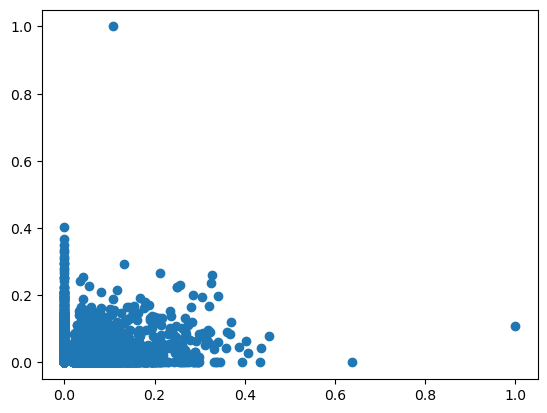

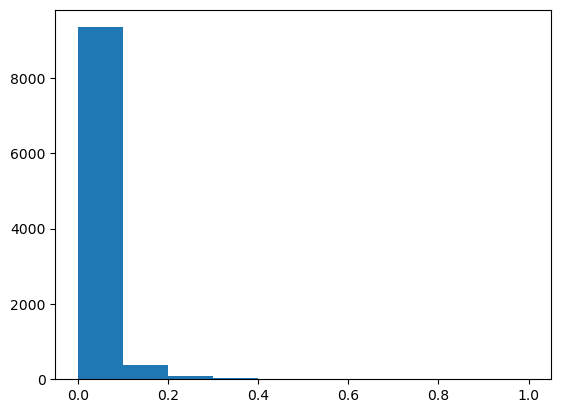

In [222]:
# plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(cosine_sim[:,0], cosine_sim[:,1])
plt.show()

# plot histogram
plt.hist(cosine_sim[:,0])
plt.show()


In [223]:
# k means clustering
from sklearn.cluster import KMeans 

In [224]:
# kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim)
kmeans.labels_

#input label to dataframe
df['label'] = kmeans.labels_
df.head()


/Users/akhmadramadani/Documents/TF/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,tweet,real_tweet,token,label
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,...",1
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",1
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",0
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",0
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",0


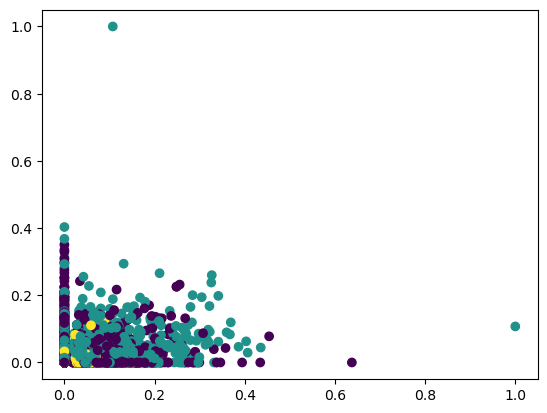

In [225]:
# plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(cosine_sim[:,0], cosine_sim[:,1], c=kmeans.labels_)
plt.show()


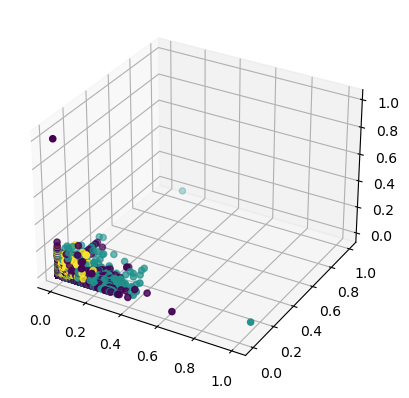

In [226]:

# plot scatter plot to 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cosine_sim[:,0], cosine_sim[:,1], cosine_sim[:,2], c=kmeans.labels_)
plt.show()

In [227]:
# count label
df['label'].value_counts()


0    5591
1    3428
2     828
Name: label, dtype: int64

In [228]:
# labelling each cluster with name 
# 0 = negative
# 1 = neutral
# 2 = positive

df["label"] = df["label"].replace({0: "negative", 1: "neutral", 2: "positive"})
df.head()

,tweet,real_tweet,token,label
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,...",neutral
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative


In [229]:
# pick 5 random tweet from each label

print("negative")
print(df[df['label'] == 'negative'].sample(10)['real_tweet'].values)

print()
print("neutral")
print(df[df['label'] == 'neutral'].sample(10)['real_tweet'].values)

print()
print("positive")
print(df[df['label'] == 'positive'].sample(10)['real_tweet'].values)



negative
[' daftar magang buat anak kupukupu itu susah banget ya  rate ketrimanya berapa '
 ' biasanya orang yang suka bilang  ngikut  pas rapat kerja kelompok tuh ada pengalaman pendapatnya tidak dihargai'
 ' kakak kakak jurusan sasing  aku mau nanya dong  dalam sastra bandingan apa kita bisa membandingan suatu karya sastra dengan versi terjemahannya    misal novel bahasa indonesia yg udah diterjemahkan ke bahasa inggris'
 ' ini gmn ya  mau buat laporan malah begini  mohon penjelasannya    '
 ' how s ur day  gais  yang lagi masih uas  semangat ' 'akun jahat'
 'hey hey hey yang sudah tiba waktunya frofozalan dan zkrepzean  adakah yg seperti shaiyyyaaa    bagaimana ini          '
 'untuk dipakai    tahun ke depan masih worth it ga ya  atau ada saran laptop buat instal apk tambahan sama ngeskripsi budget under  jt makasi   '
 ' guys ada yang punya pdf atau ebook metopen sugiyono      yang ada rumus pengambilan sampel cochran ga ya '
 ' yang skripsian hukum  ada yang pernah wawancara pela

In [230]:
# using word2vec to get vector representation of each word
from gensim.models import Word2Vec
model = Word2Vec(df['token'], min_count=1)



In [231]:
# represent each tweet with vector
def get_vector(text):
    vector = np.zeros(100)
    for word in text:
        vector += model.wv[word]
    return vector/len(text)

df['vector'] = df['token'].apply(get_vector)
df.head()

,tweet,real_tweet,token,label,vector
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.273067685465018, 0.7634588248199887, 0.174..."
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.2455397993326187, 0.7762674403687319, 0.16..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2046788539737463, 0.5637678589671851, 0.02..."
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.18299508940738937, 0.7705543590709567, 0.1..."
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.1342602487919586, 0.4469682683369943, 0.08..."


In [232]:

# remove empty vector
# 
df = df[df['vector'].apply(lambda x: len(x) != 0)]
df.head()    




,tweet,real_tweet,token,label,vector
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.273067685465018, 0.7634588248199887, 0.174..."
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.2455397993326187, 0.7762674403687319, 0.16..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2046788539737463, 0.5637678589671851, 0.02..."
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.18299508940738937, 0.7705543590709567, 0.1..."
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.1342602487919586, 0.4469682683369943, 0.08..."


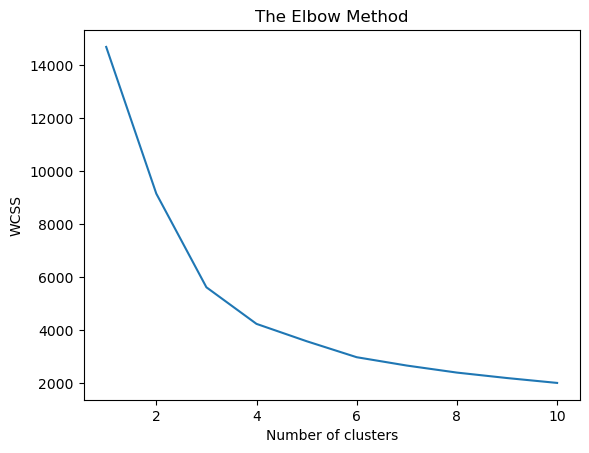

In [233]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df['vector'].values.tolist())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [234]:
# kmeans with 3 cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(df['vector'].values.tolist())
kmeans.labels_

#input label to dataframe
df['new_label'] = kmeans.labels_
df.head()



/Users/akhmadramadani/Documents/TF/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,tweet,real_tweet,token,label,vector,new_label
0,smt mending studi independen magang yaa semest...,smt mending ikut studi independen dulu apa ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.273067685465018, 0.7634588248199887, 0.174...",2
1,kampus mahasiswa wajib publish jurnal indeks s...,di kampus kalian mahasiswa s wajib publish j...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.2455397993326187, 0.7762674403687319, 0.16...",2
2,gk yh tugas uas ngerjain gausah manja utk bant...,bisa gk yh tugas uas ini ngerjain dirinya sen...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2046788539737463, 0.5637678589671851, 0.02...",2
3,dosen praktikum ngasih waktu temu kelas haru b...,dosen praktikum aku ngasih ini waktu pertemua...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.18299508940738937, 0.7705543590709567, 0.1...",2
4,alhamdulilah hidup kasi include kos kuliah jkt,alhamdulilah masih bisa hidup walaupun dikasi...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.1342602487919586, 0.4469682683369943, 0.08...",1


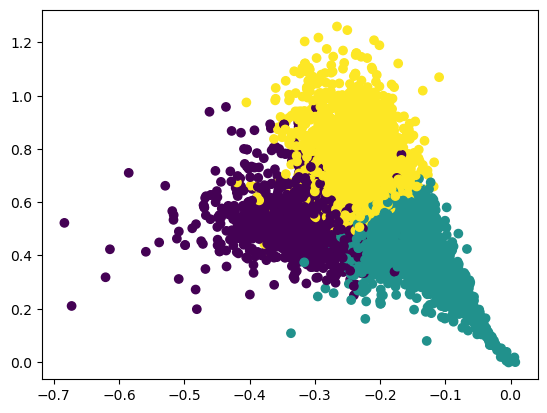

In [235]:
# plot vector to 2d plot
plt.scatter(df['vector'].apply(lambda x: x[0]), df['vector'].apply(lambda x: x[1]), c=kmeans.labels_)
plt.show()

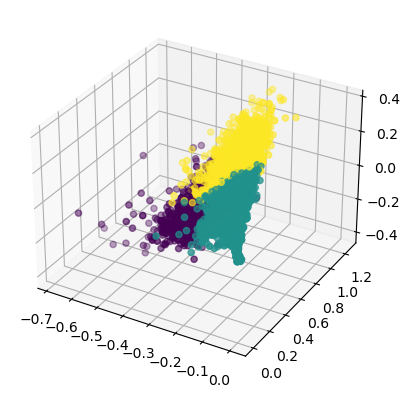

In [236]:
# plot vector to 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['vector'].apply(lambda x: x[0]), df['vector'].apply(lambda x: x[1]), df['vector'].apply(lambda x: x[2]), c=kmeans.labels_)
plt.show()

In [237]:
# count label
df['new_label'].value_counts()


2    4805
1    3869
0    1173
Name: new_label, dtype: int64

In [238]:
# get 10 random tweet from each label
print("0")
print(df[df['new_label'] == 0].sample(10)['real_tweet'].values)

print()
print("1")
print(df[df['new_label'] == 1].sample(10)['real_tweet'].values)

print()
print("2")
print(df[df['new_label'] == 2].sample(10)['real_tweet'].values)

0
[' tolong banget pliss inimah udah mentok  mohon dibantu   '
 ' temen temen boleh minta tolong isi kuisioner ku nggak   butuh dikit lagi  nanti barter juga gapapa   '
 ' mau nanya dong kak  yg udah penelitian ambil pendidikan terus sampelnya anak sekolahan  kalian butuh waktu buat penelitiannya berapa lama ya  tolong bantu sender  terima kasii  '
 ' siapa yang lagi nugas juga  semangat yaa      '
 ' yuk yang lagi butuh responden penelitian drop kuesionernya disiniii biar bisa dibantu isi sama yang lain  jangan lupa kasih kriterianya yaa  yang liat tolong bantu jugaa  kita saling bantu  semangat yang lagi penelitian     '
 ' guyss ada yg mau jdi responden ku gaa   kriterianya mahasiswa s  dari univ di jawa timur  klo mau boleh rep nanti aku dm satu   makasihh    '
 'ada yang jurusan pendidikan  jurusan teknik dan bisa bntu isi kuesioner  '
 ' halo temen temen  aku lagi butuh banyak responden buat isi kuisioner tugas akhirku  kriterianya     laki laki perempuan berusia       tahun  kal

In [239]:
# rebuild sentiment analysis model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# import dataset
dataset = pd.read_csv('datasets_garbage/tweet.csv')
dataset.head()

# check missing value
dataset.isnull().sum()

# check label distribution
dataset['new_label'].value_counts()

# split dataset to train and test

0    4840
1    3851
2    1156
Name: new_label, dtype: int64

In [240]:
# split dataset to train and test
X = dataset['real_tweet']
y = dataset['new_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create bag of word using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

# create model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[566 167 236]
 [324 241 196]
 [ 19  24 197]]


In [241]:
# accuracy
print(accuracy_score(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))


0.5096446700507614
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       969
           1       0.56      0.32      0.40       761
           2       0.31      0.82      0.45       240

    accuracy                           0.51      1970
   macro avg       0.50      0.57      0.49      1970
weighted avg       0.56      0.51      0.51      1970



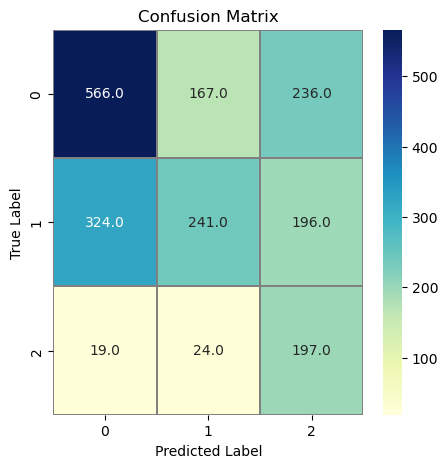

In [242]:
# Matrix plot
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap="YlGnBu", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [243]:
import pandas as pd
dataset = pd.read_csv('datasets_garbage/tweet.csv')
# re define split dataset to train and test
X = dataset['real_tweet']
y = dataset['new_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create bag of word
cv = CountVectorizer(max_features=1500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()



In [244]:
# keras for deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# create model
classifier = Sequential()

# add input layer and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1500))

# add second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# add output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# compile model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit model
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

# predict
y_pred = classifier.predict(X_test)

# convert probability to 0 or 1
y_pred = (y_pred > 0.5)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# accuracy
print(accuracy_score(y_test, y_pred))

Epoch 1/100
  1/788 [..............................] - ETA: 5:17 - loss: 0.6931 - accuracy: 0.7000

2022-12-29 16:23:51.549170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


788/788 [==============================] - 5s 6ms/step - loss: -0.6823 - accuracy: 0.5328
Epoch 2/100
788/788 [==============================] - 4s 5ms/step - loss: -16.1816 - accuracy: 0.5899
Epoch 3/100
788/788 [==============================] - 4s 5ms/step - loss: -67.8417 - accuracy: 0.5872
Epoch 4/100
788/788 [==============================] - 4s 5ms/step - loss: -169.2253 - accuracy: 0.5922
Epoch 5/100
788/788 [==============================] - 4s 5ms/step - loss: -329.5278 - accuracy: 0.5916
Epoch 6/100
788/788 [==============================] - 4s 5ms/step - loss: -556.2555 - accuracy: 0.5864
Epoch 7/100
788/788 [==============================] - 4s 5ms/step - loss: -852.9119 - accuracy: 0.5855
Epoch 8/100
788/788 [==============================] - 4s 5ms/step - loss: -1222.4919 - accuracy: 0.5797
Epoch 9/100
788/788 [==============================] - 4s 5ms/step - loss: -1668.0648 - accuracy: 0.5756
Epoch 10/100
788/788 [==============================] - 4s 5ms/step - loss: -2

2022-12-29 16:30:45.746365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


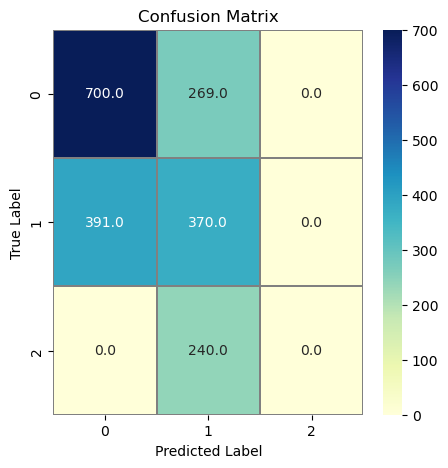

In [245]:
# plot confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap="YlGnBu", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [246]:

import pandas as pd
tw_fix = pd.read_csv('datasets_garbage/tweet_label_fix.csv')
tw_fix.head()


,tweet,label
0,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,0
1,"[cm] curhat dong, jadi aku senin kemarin chat ...",0
2,"jujur ya, pertanyaanmu nggak berpengaruh apapu...",0
3,[cm] Eneg banget nggak sih guys kalau ditanyai...,0
4,"[Cm] mau nangis, aku udh ngebubble chat 8Ã— da...",0


<AxesSubplot:xlabel='label', ylabel='count'>

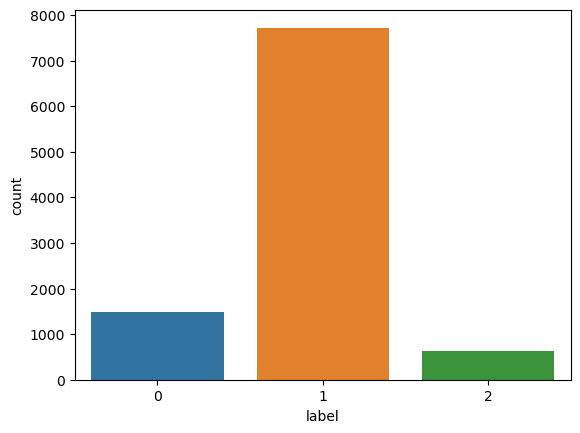

In [247]:
# plot label distribution
sns.countplot(x='label', data=tw_fix)

In [248]:
# count label
tw_fix['label'].value_counts()


1    7719
0    1490
2     631
Name: label, dtype: int64

In [285]:
# balancing dataset using synonim above

{'tag': 'v',
 'sinonim': ['ambruk',
  'gering',
  'lara',
  'a pedih',
  'perih',
  'linu',
  'ngilu',
  'nyeri']}

In [271]:
# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority2_upsampled])

# check new class counts
df_upsampled.label.value_counts()

1    7719
0    7719
2    7719
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

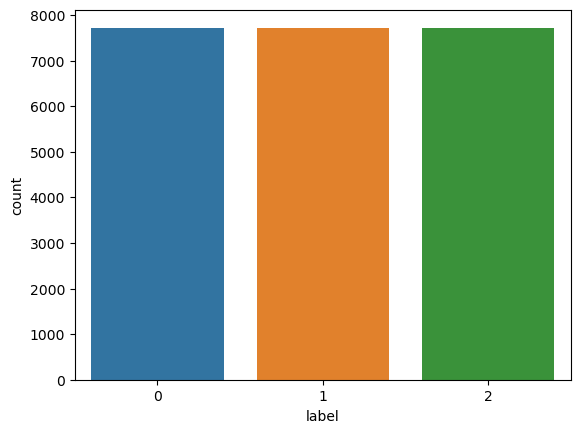

In [272]:
# plot label distribution
sns.countplot(x='label', data=df_upsampled)


In [276]:
# count duplicate
df_upsampled['tweet'].duplicated().sum()


13473

In [277]:
#count unique
df_upsampled['tweet'].nunique()

9684

In [249]:
# remove empty tweet
tw_fix = tw_fix[tw_fix['tweet'] != '']


In [250]:

# clean tweet
tw_fix['tweet'] = tw_fix['tweet'].apply(cleanTxt)
tw_fix.head()


,tweet,label
0,bisa gk yh tugas uas ini ngerjain dirinya sen...,0
1,curhat dong jadi aku senin kemarin chat dose...,0
2,jujur ya pertanyaanmu nggak berpengaruh apapu...,0
3,eneg banget nggak sih guys kalau ditanyain te...,0
4,mau nangis aku udh ngebubble chat dari s...,0


In [251]:
# remove stop word using Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

tw_fix['tweet'] = tw_fix['tweet'].apply(lambda x: stopword.remove(x))
tw_fix.head()

,tweet,label
0,gk yh tugas uas ngerjain gausah manja utk ba...,0
1,curhat senin kemarin chat dosen diread doang...,0
2,jujur pertanyaanmu nggak berpengaruh apapun b...,0
3,eneg banget nggak sih guys ditanyain skripsi ...,0
4,nangis udh ngebubble chat semalem gc kel...,0


In [252]:
# lemmatization using Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

tw_fix['tweet'] = tw_fix['tweet'].apply(lambda x: stemmer.stem(x))
tw_fix.head()

,tweet,label
0,gk yh tugas uas ngerjain gausah manja utk bant...,0
1,curhat senin kemarin chat dosen diread doang r...,0
2,jujur tanya nggak pengaruh apa bikin pusing tauuu,0
3,eneg banget nggak sih guys ditanyain skripsi k...,0
4,nang udh ngebubble chat semalem gc kelompok tp...,0


In [253]:
# tokenize tweet
tw_fix['token'] = tw_fix['tweet']
tw_fix['token'] = tw_fix['token'].apply(word_tokenize)
tw_fix.head()

,tweet,label,token
0,gk yh tugas uas ngerjain gausah manja utk bant...,0,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ..."
1,curhat senin kemarin chat dosen diread doang r...,0,"[curhat, senin, kemarin, chat, dosen, diread, ..."
2,jujur tanya nggak pengaruh apa bikin pusing tauuu,0,"[jujur, tanya, nggak, pengaruh, apa, bikin, pu..."
3,eneg banget nggak sih guys ditanyain skripsi k...,0,"[eneg, banget, nggak, sih, guys, ditanyain, sk..."
4,nang udh ngebubble chat semalem gc kelompok tp...,0,"[nang, udh, ngebubble, chat, semalem, gc, kelo..."


In [286]:
# find synonim from tesaurus-master/dict.json
import json
with open('tesaurus-master/dict.json') as f:
    data = json.load(f)

# find synonim from tesaurus-master/dict.json
def find_synonim(word):
    if word in data:
        return data[word]
    else:
        return []



In [288]:
# balance dataset using synonim above
tw_fix['token'] = tw_fix['token'].apply(lambda x: [find_synonim(i) for i in x])
tw_fix.head()

,tweet,label,token,synonim
0,gk yh tugas uas ngerjain gausah manja utk bant...,0,"[[], [], {'tag': 'n', 'sinonim': ['darma', 'ke...","[[], [], {'tag': 'n', 'sinonim': ['darma', 'ke..."
1,curhat senin kemarin chat dosen diread doang r...,0,"[[], [], {'tag': 'n', 'sinonim': ['kemarin dul...","[[], [], {'tag': 'n', 'sinonim': ['kemarin dul..."
2,jujur tanya nggak pengaruh apa bikin pusing tauuu,0,"[{'tag': 'a', 'sinonim': ['andal', 'benar', 'b...","[{'tag': 'a', 'sinonim': ['andal', 'benar', 'b..."
3,eneg banget nggak sih guys ditanyain skripsi k...,0,"[[], {'tag': 'adv', 'sinonim': ['cak amat sang...","[[], {'tag': 'adv', 'sinonim': ['cak amat sang..."
4,nang udh ngebubble chat semalem gc kelompok tp...,0,"[{'tag': 'p', 'sinonim': ['nan', 'yang']}, [],...","[{'tag': 'p', 'sinonim': ['nan', 'yang']}, [],..."


In [259]:
# split dataset to train and test
X = tw_fix['tweet']
y = tw_fix['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [260]:
# create bag of word using CountVectorizer
cv = CountVectorizer(max_features=1500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()



In [261]:
# create model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# accuracy
print(accuracy_score(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))


0.35772357723577236
              precision    recall  f1-score   support

           0       0.21      0.56      0.30       278
           1       0.90      0.31      0.46      1567
           2       0.10      0.57      0.17       123

    accuracy                           0.36      1968
   macro avg       0.40      0.48      0.31      1968
weighted avg       0.75      0.36      0.42      1968



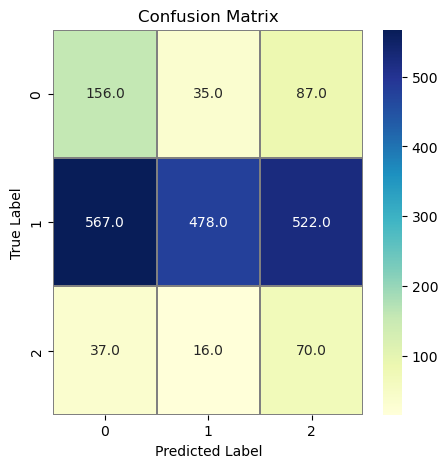

In [262]:
# plot confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.01, cmap="YlGnBu", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()